In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

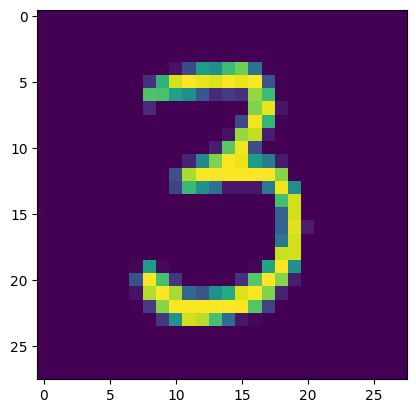

3


In [ ]:
#displaying the image and label
plt.imshow(X_train[50])
plt.show()
print(y_train[50])

In [ ]:
#scaling the values
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
#model building
model =keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=20,batch_size=64)

Epoch 1/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3564 - accuracy: 0.8988
Epoch 2/20
938/938 [==============================] - 3s 4ms/step - loss: 0.1615 - accuracy: 0.9532
Epoch 3/20
938/938 [==============================] - 2s 3ms/step - loss: 0.1198 - accuracy: 0.9652
Epoch 4/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0975 - accuracy: 0.9708
Epoch 5/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0824 - accuracy: 0.9747
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0704 - accuracy: 0.9791
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0611 - accuracy: 0.9812
Epoch 8/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0546 - accuracy: 0.9830
Epoch 9/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0472 - accuracy: 0.9851
Epoch 10/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0421 - accuracy: 0.9866

In [ ]:
loss,accuracy = model.evaluate(X_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1149 - accuracy: 0.9727
0.9726999998092651


So, training accuracy = 99.49%
Test accuracy = 97.36%

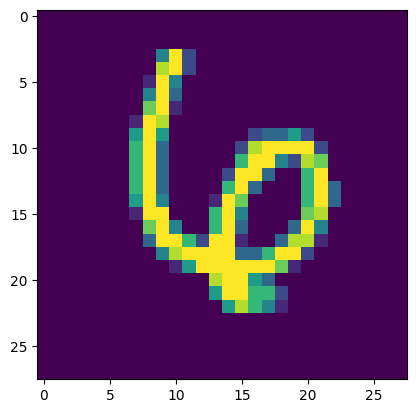

6


In [ ]:
#first data point in X_test
plt.imshow(X_test[22])
plt.show()
print(y_test[22])  #y_test is the actual data

In [ ]:
y_pred = model.predict(X_test)  #we are feeding our model test data and output is stored in y_pred

313/313 [==============================] - 1s 2ms/step


model.predict() gives the prediction probability of each class for that data output.

In [ ]:
print(y_pred.shape)
print(y_pred[0])

(10000, 10)
[5.9308562e-02 6.5840381e-06 2.3384515e-02 9.2883462e-01 2.4748717e-03
 2.5752486e-05 1.2499812e-09 9.9999845e-01 7.3242784e-02 9.9972671e-01]


In [ ]:
label_for_image = np.argmax(y_pred[0])
print(label_for_image)

7


In [ ]:
# so we need to convert the probability into class labels.
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 3, 5, 9, 2, 6, 4, 1, 5, 9, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred_labels)
print(conf_matrix)

tf.Tensor(
[[ 968    1    0    2    0    1    3    1    2    2]
 [   0 1122    3    1    0    1    3    1    3    1]
 [   1    2  998   14    1    0    3    3   10    0]
 [   1    0    2  990    1    5    0    4    1    6]
 [   0    1    5    1  963    0    8    0    0    4]
 [   3    0    0   18    2  856    4    0    5    4]
 [   6    3    1    0    3    4  938    0    2    1]
 [   1    3    7   15    7    0    0  978    4   13]
 [   2    1    5   10    6    6    2    3  931    8]
 [   2    2    0    6   12    3    0    4    3  977]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Lablels')

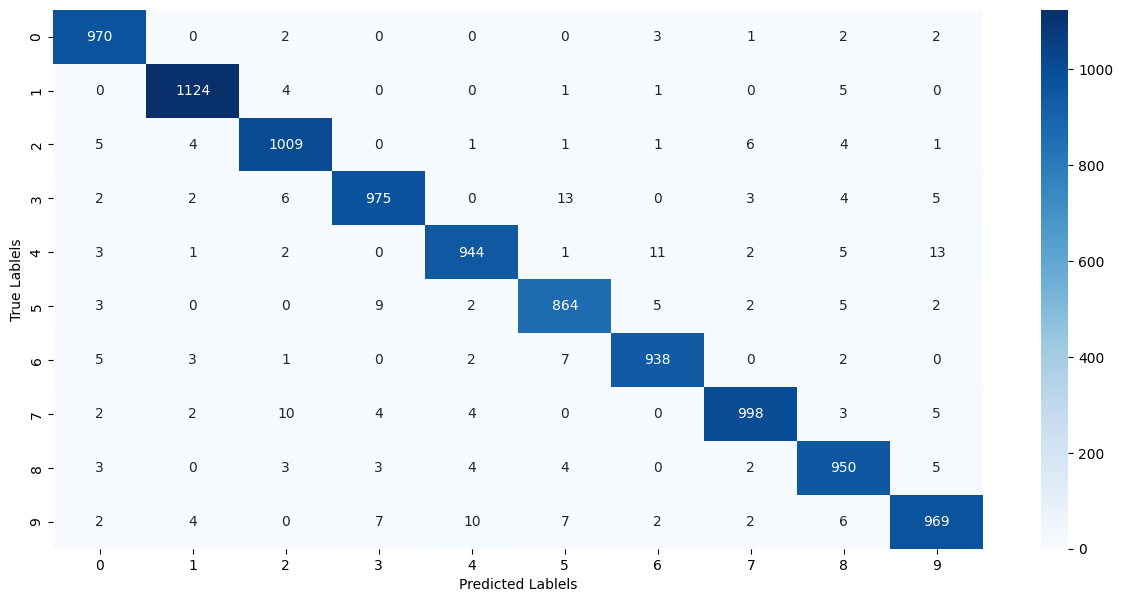

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix ,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Lablels')
plt.xlabel('Predicted Lablels')

In [44]:
# Prediction System
input_image_path = '/content/mnist_6_image.png'
input_image = cv2.imread(input_image_path)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale.shape

input_image_resize = cv2.resize(grayscale,(28,28))
input_image_resize.shape

input_image_resize = input_image_resize/255

image_reshape = np.reshape(input_image_resize,[1,28,28])  #reshape is used to tell the model that we are giving only one data point not predict the output

input_prediction = model.predict(image_reshape)
print(input_prediction)

label_for_predicted_image = np.argmax(input_prediction)
print('Predicted image is : ' , label_for_predicted_image)

1/1 [==============================] - 0s 19ms/step
[[1.3721889e-13 5.0117947e-06 9.9862808e-01 2.0142352e-18 1.8749381e-20
  4.3785198e-16 9.9996835e-01 1.0000000e+00 7.1200862e-10 2.2686981e-03]]
Predicted image is :  7
